In [5]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-6-1216953901.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.xticks(rotation=45); plt.legend(); plt.grid(True); plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


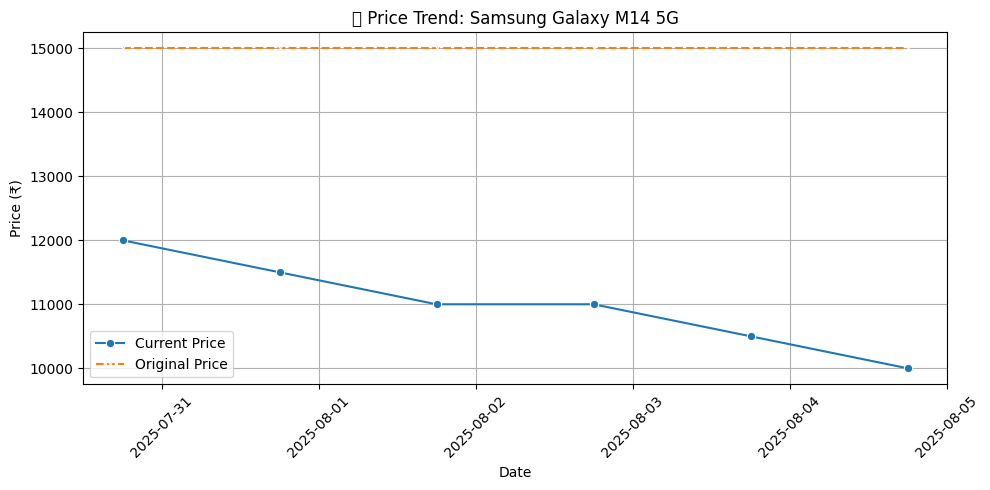

/tmp/ipython-input-6-1216953901.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_df, x='Timestamp', y='Discount (%)', palette='Blues')
/tmp/ipython-input-6-1216953901.py:72: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.xticks(rotation=45); plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


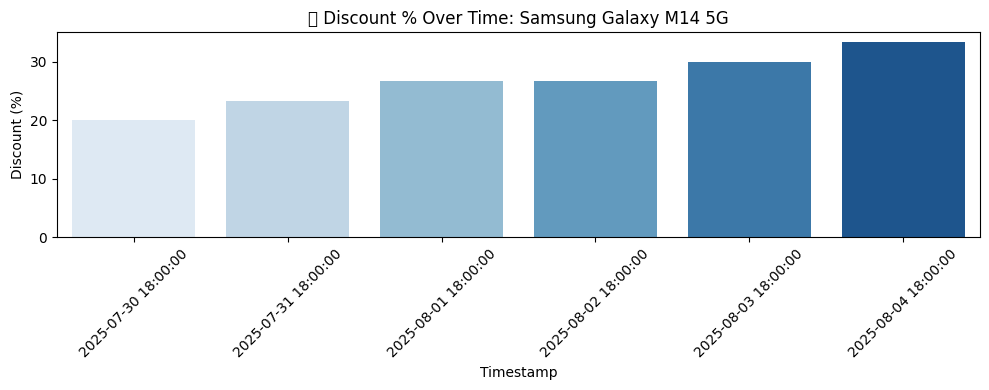

/tmp/ipython-input-6-1216953901.py:81: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.xticks(rotation=45); plt.tight_layout()
/tmp/ipython-input-6-1216953901.py:81: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.xticks(rotation=45); plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


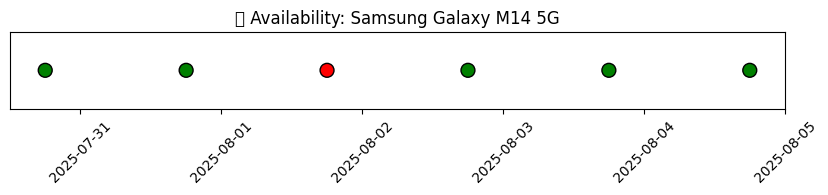

⚠️ ALERT: Big drop for Samsung Galaxy M14 5G! Discount: 33.34%

📄 PDF Summary Saved: /content/price_summary_report.pdf


In [6]:
# 📌 STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
import numpy as np

# 🌐 STEP 2: Set file path (after uploading in Colab)
file_path = '/content/drive/MyDrive/price_log.csv'  # Replace this if needed
df = pd.read_csv(file_path)

# 📌 STEP 3: Preprocess
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Discount (%)'] = ((df['Original Price'] - df['Current Price']) / df['Original Price']) * 100

# 📌 STEP 4: Generate PDF Report
summary_file = "/content/price_summary_report.pdf"
c = canvas.Canvas(summary_file, pagesize=A4)
text = c.beginText(40, 800)
text.setFont("Helvetica", 11)
text.textLine("📊 Monthly Price Summary Report")
text.textLine(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
text.textLine("")

# 📌 STEP 5: Plot and Predict Per Product
for product in df['Product Name'].unique():
    sub_df = df[df['Product Name'] == product].sort_values('Timestamp')
    sub_df['Day'] = sub_df['Timestamp'].dt.dayofyear

    # 🧠 Predict future price using Linear Regression
    model = LinearRegression()
    X = sub_df[['Day']]
    y = sub_df['Current Price']
    model.fit(X, y)
    next_day = sub_df['Day'].max() + 7
    future_price = model.predict([[next_day]])[0]

    # 🧾 Monthly Avg Discount
    sub_df['Month'] = sub_df['Timestamp'].dt.strftime('%B')
    monthly_avg = sub_df.groupby('Month')['Discount (%)'].mean()

    # ⏱️ Best discount day
    best_day = sub_df.loc[sub_df['Discount (%)'].idxmax()]
    best_date = best_day['Timestamp'].date()
    best_discount = best_day['Discount (%)']

    # 🖨️ Add to PDF
    text.textLine(f"🔹 Product: {product}")
    text.textLine(f"🔮 Predicted Price (1 week later): ₹{future_price:.2f}")
    text.textLine(f"📆 Best Deal: {best_discount:.2f}% on {best_date}")
    text.textLine("📊 Monthly Avg Discounts:")
    for m, d in monthly_avg.items():
        text.textLine(f"   • {m}: {d:.2f}%")
    text.textLine("—" * 60)

    # 📈 Price Trend
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=sub_df, x='Timestamp', y='Current Price', marker='o', label='Current Price')
    sns.lineplot(data=sub_df, x='Timestamp', y='Original Price', marker='x', linestyle='--', label='Original Price')
    plt.title(f'📊 Price Trend: {product}')
    plt.xlabel('Date'); plt.ylabel('Price (₹)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

    # 💰 Discount Over Time
    plt.figure(figsize=(10, 4))
    sns.barplot(data=sub_df, x='Timestamp', y='Discount (%)', palette='Blues')
    plt.title(f'💰 Discount % Over Time: {product}')
    plt.xticks(rotation=45); plt.tight_layout()
    plt.show()

    # 📦 Availability
    plt.figure(figsize=(10, 1))
    colors = {'In Stock': 'green', 'Out of Stock': 'red'}
    status = sub_df['Availability'].map(colors)
    plt.scatter(sub_df['Timestamp'], [1]*len(sub_df), c=status, s=100, edgecolors='black')
    plt.yticks([]); plt.title(f'📦 Availability: {product}')
    plt.xticks(rotation=45); plt.tight_layout()
    plt.show()

    # ⚠️ Alert
    latest_discount = sub_df['Discount (%)'].iloc[-1]
    if latest_discount >= 20:
        print(f"⚠️ ALERT: Big drop for {product}! Discount: {latest_discount:.2f}%")
    else:
        print(f"✅ No major drop for {product}. Current discount: {latest_discount:.2f}%")

# 📁 Save PDF Summary
c.drawText(text)
c.save()
print(f"\n📄 PDF Summary Saved: {summary_file}")
